In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [4]:
SAMPLE_RATE = 16000
def generate_signal_raw(freq, num_samples):
    duration = num_samples / SAMPLE_RATE
    time = freq * 2.0 * np.pi * np.linspace(0, duration, np.floor(num_samples))
    return np.sin(time)

sync = generate_signal_raw(16, SAMPLE_RATE / 8)
base = generate_signal_raw(5, SAMPLE_RATE - (SAMPLE_RATE / 8))
signal = np.tile(np.concatenate((sync, base)), 4)
signal = np.roll(signal, 16000)
#signal = [int((i-3)%8==0) for i in range(64)]
correlation = np.correlate(signal, sync)
S = np.fft.rfft(correlation)


Signal = np.fft.rfft(correlation)
Sync = np.fft.rfft(sync)


/home/oscar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


In [5]:
plt.plot(range(sync.size), sync)
plt.show()

plt.plot(range(Sync.size)[:100], np.abs(Sync)[:100])
plt.show()

Phase: -2.198280
Standard Deviation: 285.029237


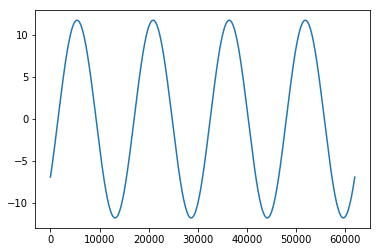

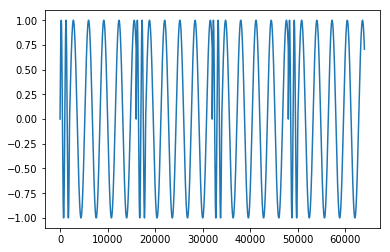

In [246]:

F = np.array(S)
F[:] = 0
F[4] = S[4]
mag = np.abs(S)
phase = np.angle(S)
#print(correlation)
correlation = np.fft.irfft(S)
corr2 = np.fft.irfft(F)
print("Phase: %f" % np.angle(S[4]))
print("Standard Deviation: %f" % np.std(correlation))
plt.plot(range(corr2.size), corr2)
plt.show()
plt.plot(range(correlation.size), correlation)
plt.show()
plt.plot(range(signal.size), signal)
plt.show()

In [113]:
print(SAMPLE_RATE *  7/ 8)
np.argmax(correlation)

14000.0


11644

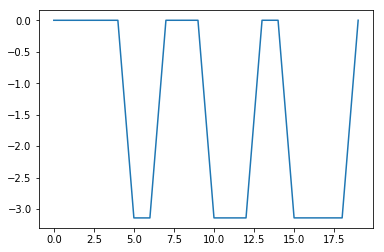

[  0.00000000e+00   4.13362015e-05   8.26724031e-05   1.24008605e-04
   1.65344806e-04  -3.14138597e+00  -3.14134464e+00   2.89353411e-04
   3.30689612e-04   3.72025814e-04  -3.14117929e+00  -3.14113796e+00
  -3.14109662e+00   5.37370620e-04   5.78706822e-04  -3.14097261e+00
  -3.14093127e+00  -3.14088994e+00  -3.14084860e+00   7.85387829e-04]


In [118]:
x = np.linspace(0, phase.size, phase.size)
plt.plot(x[:20], phase[:20])
plt.show()
print(phase[:20])

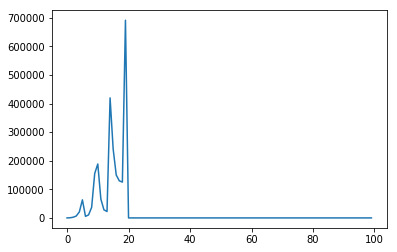

0.000249993421226
19
21030.0318697
0.0


In [115]:
x = np.linspace(0, phase.size, phase.size)
plt.plot(x[:100], mag[:100])
plt.show()
print(0.5 * np.argmax(mag)/phase.size)
print(np.argmax(mag))
print(mag[4])
print(mag[71])

In [104]:

time = 4 * 2.0 * np.pi * np.linspace(0, 1, SAMPLE_RATE * 4)
y = np.sin(time)
plt.plot(time, y)
plt.show()

In [96]:
i = int(1.0/32 * 2 * mag.size)
print(mag[i])
print(mag.size)
print(S.size)
print(correlation.size)

0.212539151094
38001
38001
76001


In [16]:
print(phase)
print(-2.356 / np.pi)

[ 0.          0.         -0.          0.          0.          0.          0.
  0.         -2.35619449  0.          0.          0.          0.          0.
  0.          0.          1.57079633  0.          0.          0.          0.
  0.          0.          0.         -0.78539816  0.          0.          0.
  0.          0.          0.          0.          3.14159265]
-0.7499380918490108


In [25]:
new_phase = phase + 0.78
new_fft = mag * np.cos(new_phase) + 1j * np.sin(new_phase)
new_sig = np.fft.irfft(new_fft)
plt.plot(range(new_sig.size), new_sig)
plt.show()

In [24]:
print(1j * 50)
print(new_fft)

50j
[ 8.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j         -2.11098440+0.96455742j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          2.70990336-0.94088077j  0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  6.54519774+0.57500525j  0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j         -6.16410594-0.63742399j]
